# Welcome to the Minecraft Group Project!

## <ins>Introduction</ins> (459 words) 
In recent years, artificial intelligence, particularly generative AI, has been evolving at a rapid pace, with even more significant growth anticipated in the future ([Tang et al., 2020](https://doi.org/10.1016/j.joi.2020.101094 )). This as a result led to a widespread adoption of AI technologies across many domains and fields including healthcare, business and education ([Rashid & Karim, 2024](https://doi.org/10.1016/j.hybadv.2024.100277 )). While AI can have many important benefits, many experts have weighed in on the potential misuse of AI, sparking safety and privacy concerns for users across the world ([El-Helaly, 2024](https://doi.org/10.23749/mdl.v115i2.15835); [Khlaif et al., 2023](https://doi.org/10.2196/47049 ); [Rashid & Karim, 2024](https://doi.org/10.1016/j.hybadv.2024.100277 )). 

With this, the Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia (UBC), is focused on research on embodied AI—artificial intelligence that can think, act, and learn similar to that of a human being ([PLAICraft, 2024](https://www.plaicraft.ai/ )). The group's mission focuses on the development of safe and reliable AI systems that foster human trust ([PLAICraft, 2024](https://www.plaicraft.ai/ )). To help achieve this goal, the team has presented two datasets [sessions.csv](https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB) and [players.csv](https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz) and [sessions.csv](https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB) that can be used to identify which “kind” of player are likely to contribute a greater volume of data. This inquiry will be the central focus of this report.

The two datasets provided are [players.csv](https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz) and [sessions.csv](https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB) (as mentioned). The `sessions.csv` dataset includes players’ hashed email, the [actual] start and end time in the format of date and 24-hour time, and the original start and end time of the sessions in UNIX format. Further, sessions.csv does not contain any anomalies. However, the dataset being used in this study is derived from `players.csv` because this is the only dataset that contains two variables related to the research questions, `Age` and `Total Playtimes`. This dataset contains a total of 196 observations and nine variables. These variables are listed and described in the table below:

<!DOCTYPE html>
<html>
<body>
    <table style="border-collapse: collapse; width: 40%; margin: auto auto; table-layout: auto; border: 0px solid black;">
        <caption style="font-size: 1.1em; font-weight: bold; margin-bottom: 5px; text-align: center;">
            Table 1: The Name, Data Type, and Meaning of Variables in <code>players.csv</code>
        </caption>
        <tr>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Name</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Data Type</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Meaning</th>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Experience</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Self-evaluated experience with Minecraft</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Subscribe</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>lgl</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Declarations to receive email updates</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Hashed Email</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Encrypted email via Hash</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Played Hours</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>dbl</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Total played hours</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">A fake name used in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>dbl</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Individual ID</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The player's ID in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Organization Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;"><code>chr</code></td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The name of the players’ school/organization</td>
        </tr>
    </table>
</body>
</html>


It is important to note while the data can be used to provide meaningful insights into relevant topics, there are potential issues (anomalies) that exist in this data. This includes (1) missing values for `Individual ID` and `Organization Name` (e.g. reported as NA), (2) potential inaccuracy in the self-reported age (e.g. age 91 and 99) and (3) playtime might not correlate to contribution levels to the study (e.g microphone can also be used)

## <ins>Methods & Results</ins>
### Please delete below when done
*   **Methods & Results**:
    *   describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    *   your report should include code which:
        *   loads data  
        *   wrangles and cleans the data to the format necessary for the planned analysis
        *   performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
        *   creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
        *   performs the data analysis
        *   creates a visualization of the analysis 
        *   _note: all figures should have a figure number and a legend_

In [56]:
# Loading the appropriate libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(ggplot2)

### &nbsp;&nbsp;&nbsp; (1) Load the Data
After examining that the data is of comma-separated value files with the delimiter as a common (i.e. ","), we read in the data using the `read_csv()` as provided by `tidyverse` package using the URL given by the PLAICraft team. Do note that both files are being loaded in case that `sessions.csv` is needed for any potential use. Despite this, `players.csv` dataset is still the main focus of this study.

In [9]:
# Constants
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

# Reading in the data via URL
mc_players <- read_csv(url_players)
head(mc_players, 10)
mc_sessions <- read_csv(url_sessions)
head(mc_sessions, 10)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### &nbsp;&nbsp;&nbsp; (3) Data Wrangling
Upon the initial examination, it is clear that in the `players.csv`, the columns/variables `individualID` and `organizationName` provide no information as all values are `NA` values. Similarly, the `experience`, `subscribe`, `hashedEmail` and `name` were also removed using the `select()` function as these variables have no values in the question of this paper (i.e. the research question does not look at these variables). Here, the Age variable is arranged in ascending order for better readability. 

In [10]:
# Remove unnecessary columns
mc_cleaned <- mc_players |>
    select(played_hours, age, gender) |>
    arrange(age)

# Shorten for easier preview
head(mc_cleaned, 10)

played_hours,age,gender
<dbl>,<dbl>,<chr>
0.3,8,Male
30.3,9,Male
3.6,10,Male
2.9,11,Male
0.5,12,Male
17.2,14,Male
0.2,14,Male
0.1,15,Male
0.1,15,Male


### &nbsp;&nbsp;&nbsp; (4) Exploratory Visualizations and Analysis
As part of the initial investigation, a histogram plot was created to show the distribution of of total Played Hours (hrs) and the Number of Players, as well as a scatter plot of total Played Hours (hrs) against the Age (yrs) of the players.

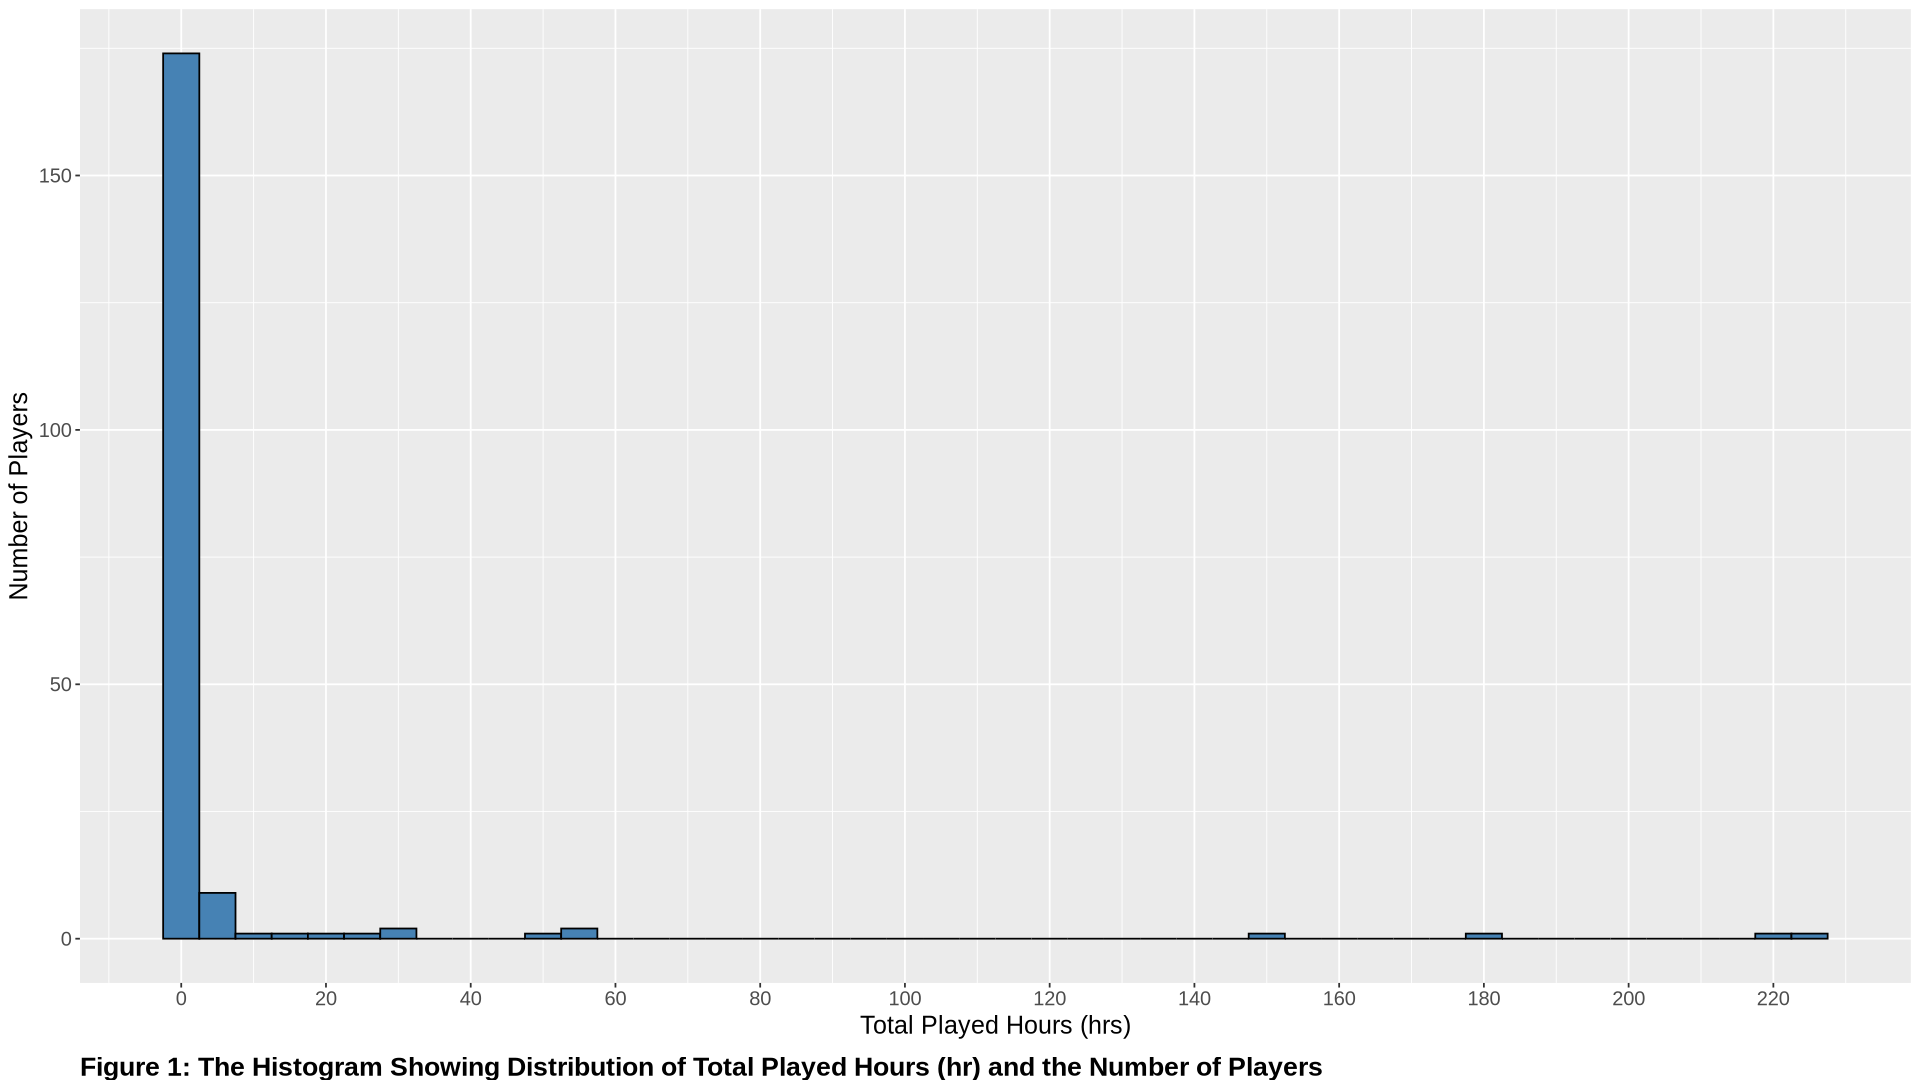

In [58]:
# Plot settings (width and height)
options(repr.plot.width = 16, repr.plot.height = 9)

# Distribution of total played hours across all players
ggplot(mc_cleaned, aes(x = played_hours)) +
    geom_histogram(binwidth = 5, fill = "steelblue", color = "black") + 
    labs(x = "Total Played Hours (hrs)", 
         y = "Number of Players",
         caption = "Figure 1: The Histogram Showing Distribution of Total Played Hours (hr) and the Number of Players") +
    theme(text = element_text(size = 15),
          plot.caption = element_text(hjust = 0, vjust = -1, size = 16, face = "bold")) + 
    scale_x_continuous(breaks = seq(from = 0, to = 220, by = 20))

Looking at Figure 1 above, it is observed that the distribution is highly right-skewed, where the majority of players have very low playtime (around 1 to 10 hours) while a small number of players have playtimes exceeding 50 hours. Further, no players were observed to have total hours played from 60 to 140 hours. 



Next, a scatter plot of total Played Hours (hrs). vs the Age (yrs) of the Players can be created.

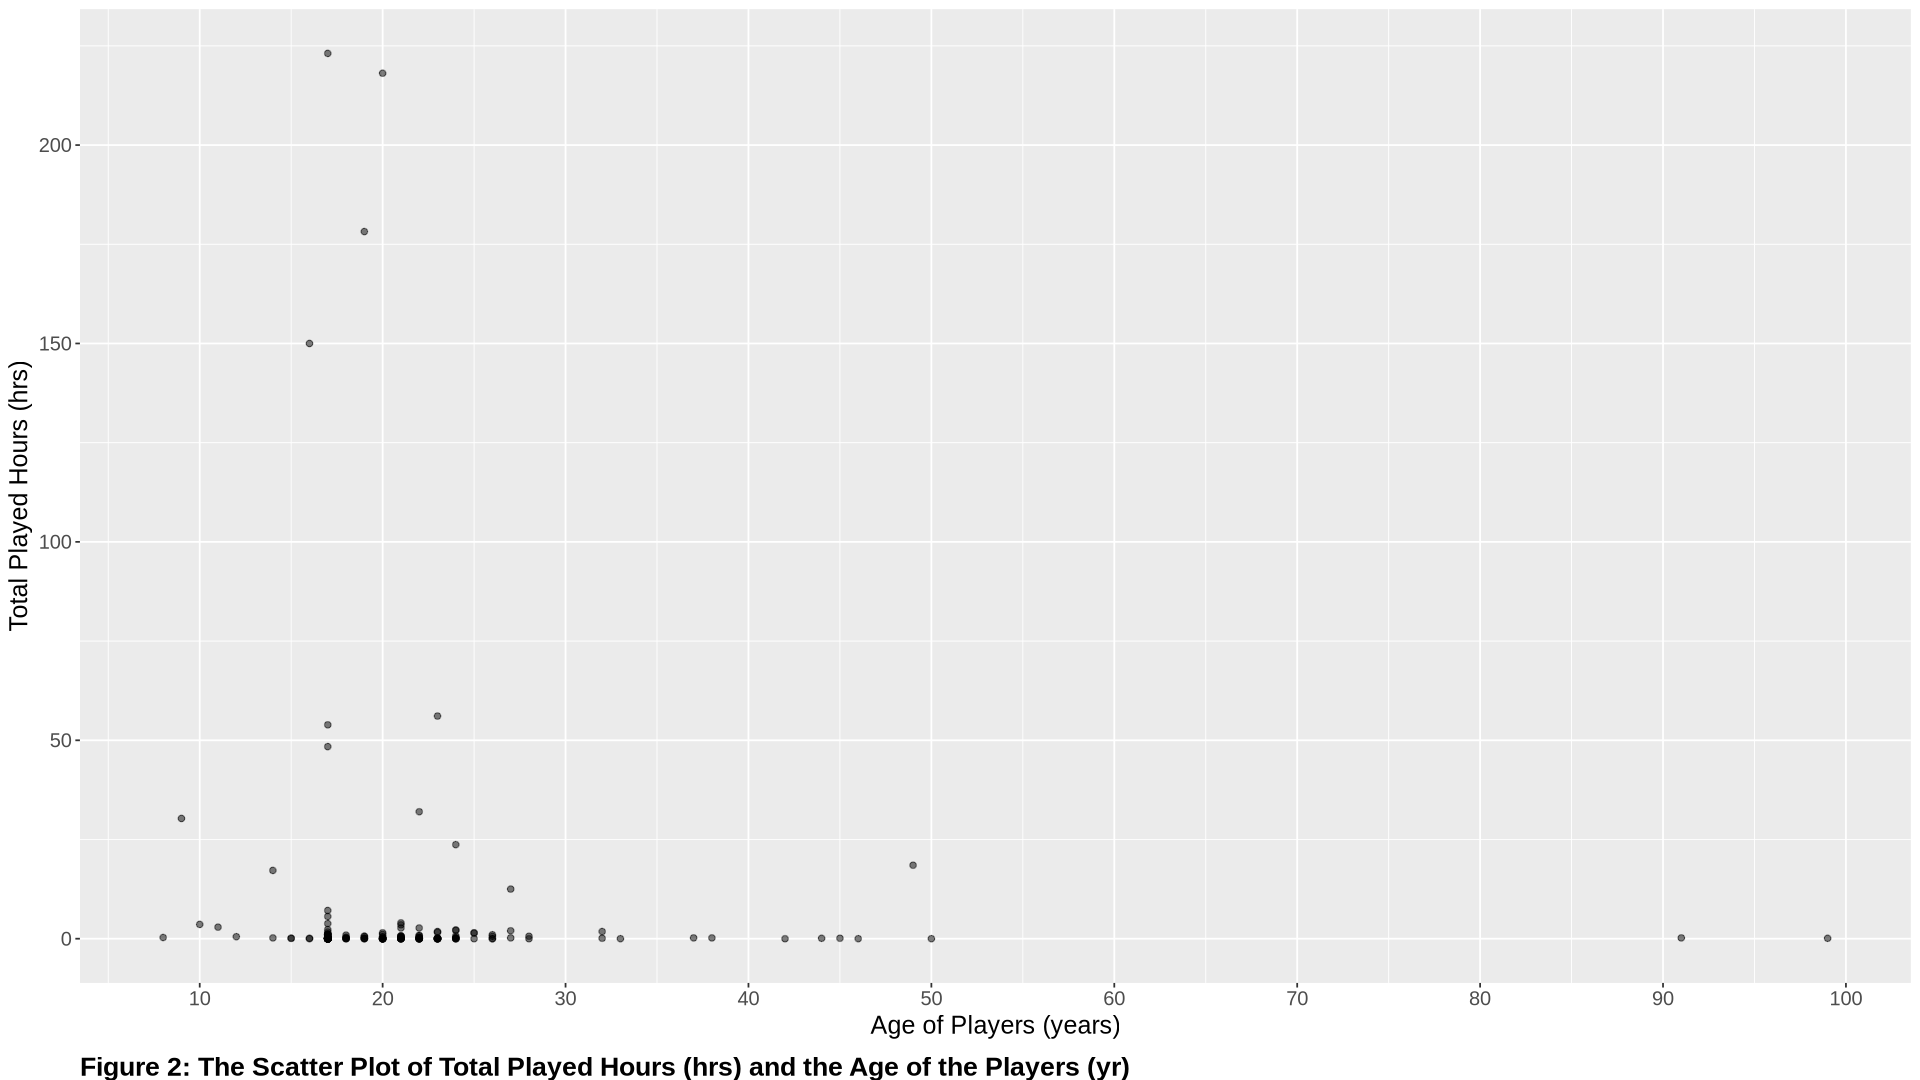

In [57]:
# Plot settings (width and height) 
options(repr.plot.width = 16, repr.plot.height = 9)

# Scatter plot of played hours vs. age per person
ggplot(mc_cleaned, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age of Players (years)",
         y = "Total Played Hours (hrs)",
        caption = "Figure 2: The Scatter Plot of Total Played Hours (hrs) and the Age of the Players (yr)") +
    theme(text = element_text(size = 15),
         plot.caption = element_text(hjust = 0, vjust = -1, size = 16, face = "bold")) +
    scale_x_continuous(breaks = seq(from = 0, to = 100, by = 10))

From Figure 2, it is observed that there is no linear relationship between age and played hours. Therefore, K-NN Regression is the most suitable regression model to use as the variables are quantitative and that there is no linear relationship (as mentioned).

We implemented a K-NN regression model to predict the `playtime` of a player based on their `age` with **seed 1**.

**Preprocessing**:
  - Set seed as 1, set plot width/height.
  - Split the dataset into training (75%) and testing (25%) subsets, stratified by `played_hours`. A 75%-25% training-testing split is ideal because it balances an
    ample amount of training data with enough testing data to reasonably thoroughly test the trained model.
  - Tuned neighbours, used "kknn" engine and "regression" mode.
  - Scaled and centered `age`.

In [37]:
# Set seed as 1
set.seed(1)

# Settings for the environment
options(repr.plot.width = 16, repr.plot.height = 9)

# Splitting the data into training set and testing set
mc_split <- initial_split(mc_cleaned, prop = 0.75, strata = played_hours)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

# Create the tuning model/engine specification with tune()
mc_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression") 

# Create the recipe that will be used
mc_recipe <- recipe(played_hours ~ age, data = mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

**Tuning**:
- Performed 10-fold cross-validation to tune the number of `neighbors` (1–100).
  - The optimal number of folds to use is typically 5 or 10. In this model, we are using 10 folds to achieve thorough cross-validation while ensuring not too many computational resources are being used.
  - We chose a range of neighbours from 1 to 100 as, given a dataset with 196 observations, using about half of the values in the data set is approximately the upper limit for a reasonable number of neighbours.
- Selected the number of neighbours (K) with the lowest RMSE.
- Exploratory plot for RMSE vs. K-value

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





[1] "Ideal K value = 42"


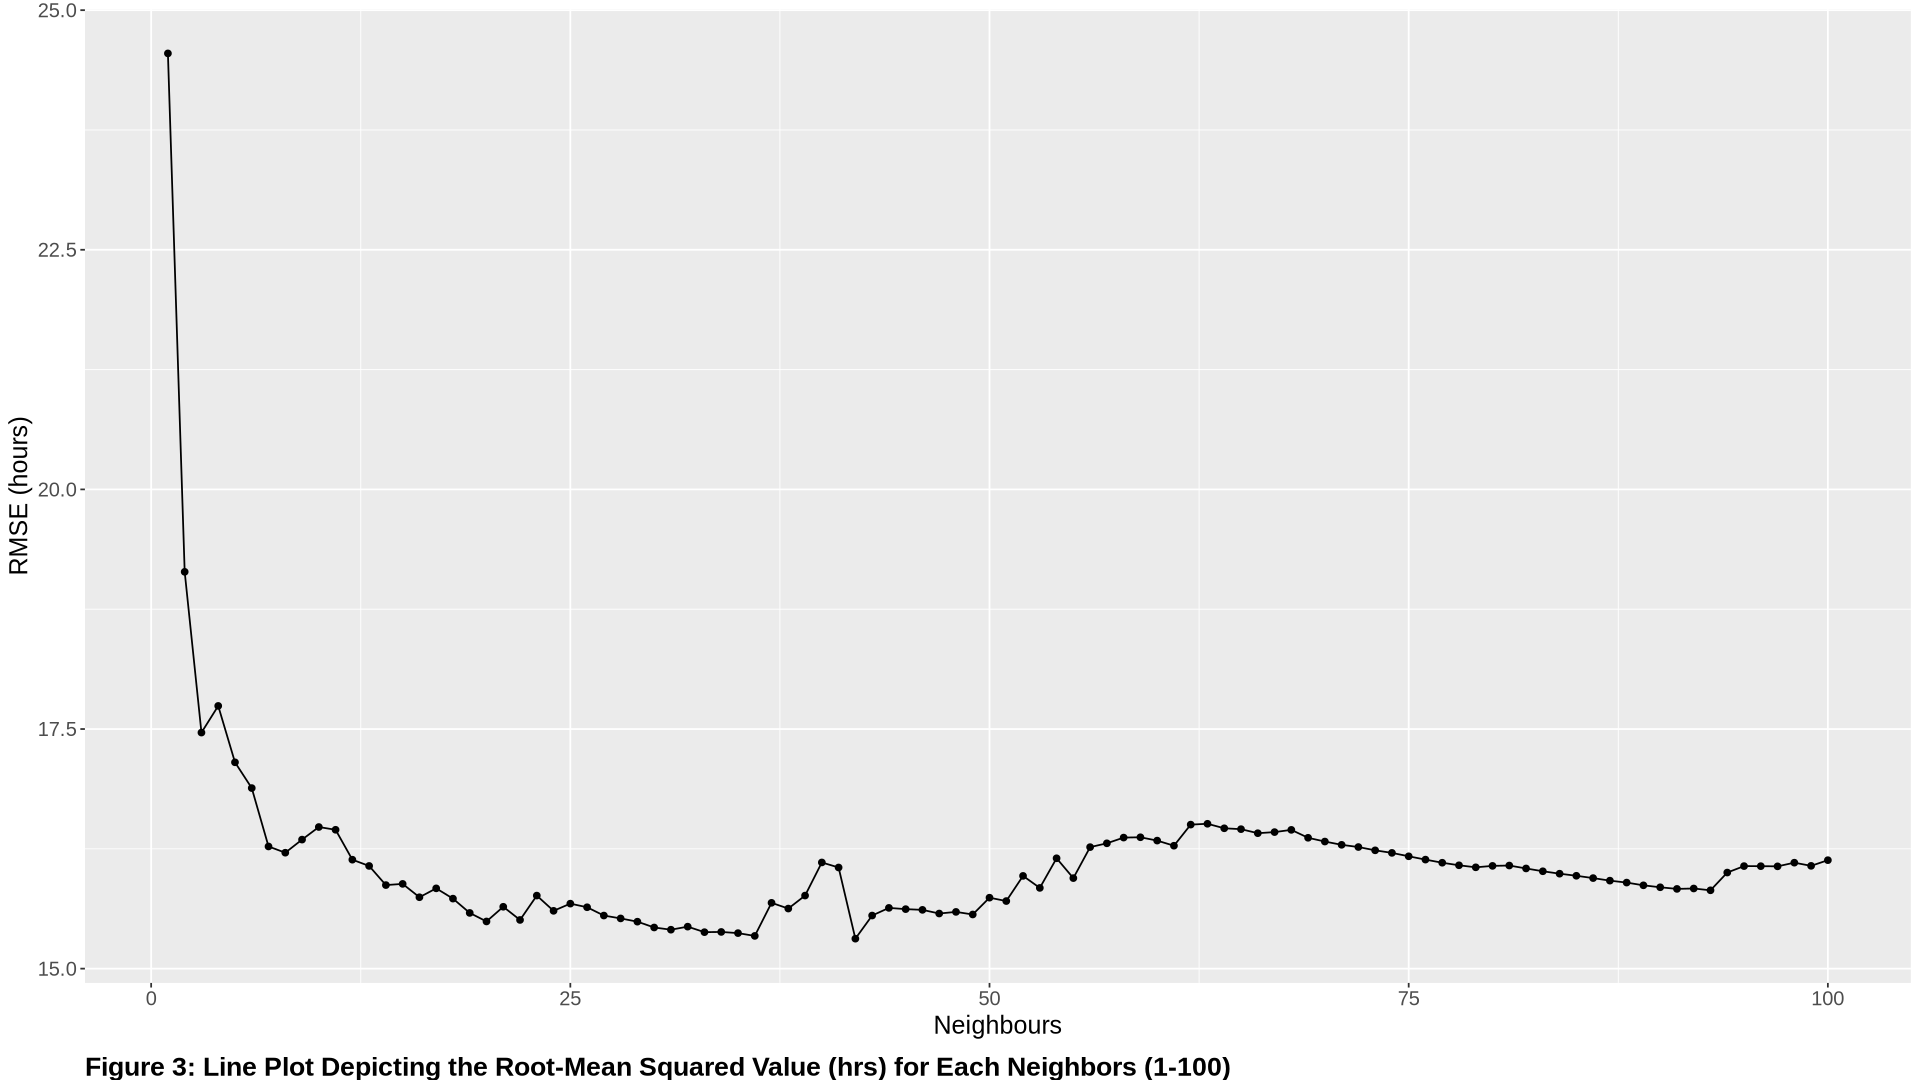

In [53]:
# Settings for the Cross-Validation with 10 folds
mc_vfold <- vfold_cv(mc_train, v = 10, strata = played_hours)

# The different number of neighbors (from 1 to 100) as a tibble
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1)) 

# Create the workflow to find the best K-value (lowest RMSPE)
mc_wkflw <- workflow() |>
    add_model(mc_spec) |>
    add_recipe(mc_recipe) 

# The metrics collected to find the K-value with the lowest RMSE
mc_results <- mc_wkflw |>
  tune_grid(resamples = mc_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# Show only the row of minimum RMSE and extracting the "neighbors" (K-value) value
mc_k <- mc_results |>
    slice_min(mean, n = 1) |>
    pull(neighbors)
print(paste("Ideal K value =", mc_k))

# Plots RMSE vs. Neighbours
mc_rmse_plot <- mc_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours",
         y = "RMSE (hours)",
        caption = "Figure 3: Line Plot Depicting the Root-Mean Squared Value (hrs) for Each Neighbors (1-100)") +
    theme(text = element_text(size = 15),
         plot.caption = element_text(hjust = 0, vjust = -1, size = 16, face = "bold"))
mc_rmse_plot

**Model Training and Prediction**:
  - Trained the final K-NN regression model with the optimal number of neighbors (20).

In [40]:
# Creating a new model/engine specification with the NEW K-value
mc_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = mc_k) |>
    set_engine("kknn") |>
    set_mode("regression") 

# Setting up the workflow with the new K-value
mc_fit <- workflow() |>
    add_recipe(mc_recipe) |>
    add_model(mc_spec_2) |>
    fit(data = mc_train) 

# Fitting the data
mc_preds <- mc_fit |>
  predict(mc_train) |>
  bind_cols(mc_train)

**Visualization**:
  - Created a scatter plot of actual `played_hours` vs. `age` with a regression line representing the predicted `played_hours` based on the model.

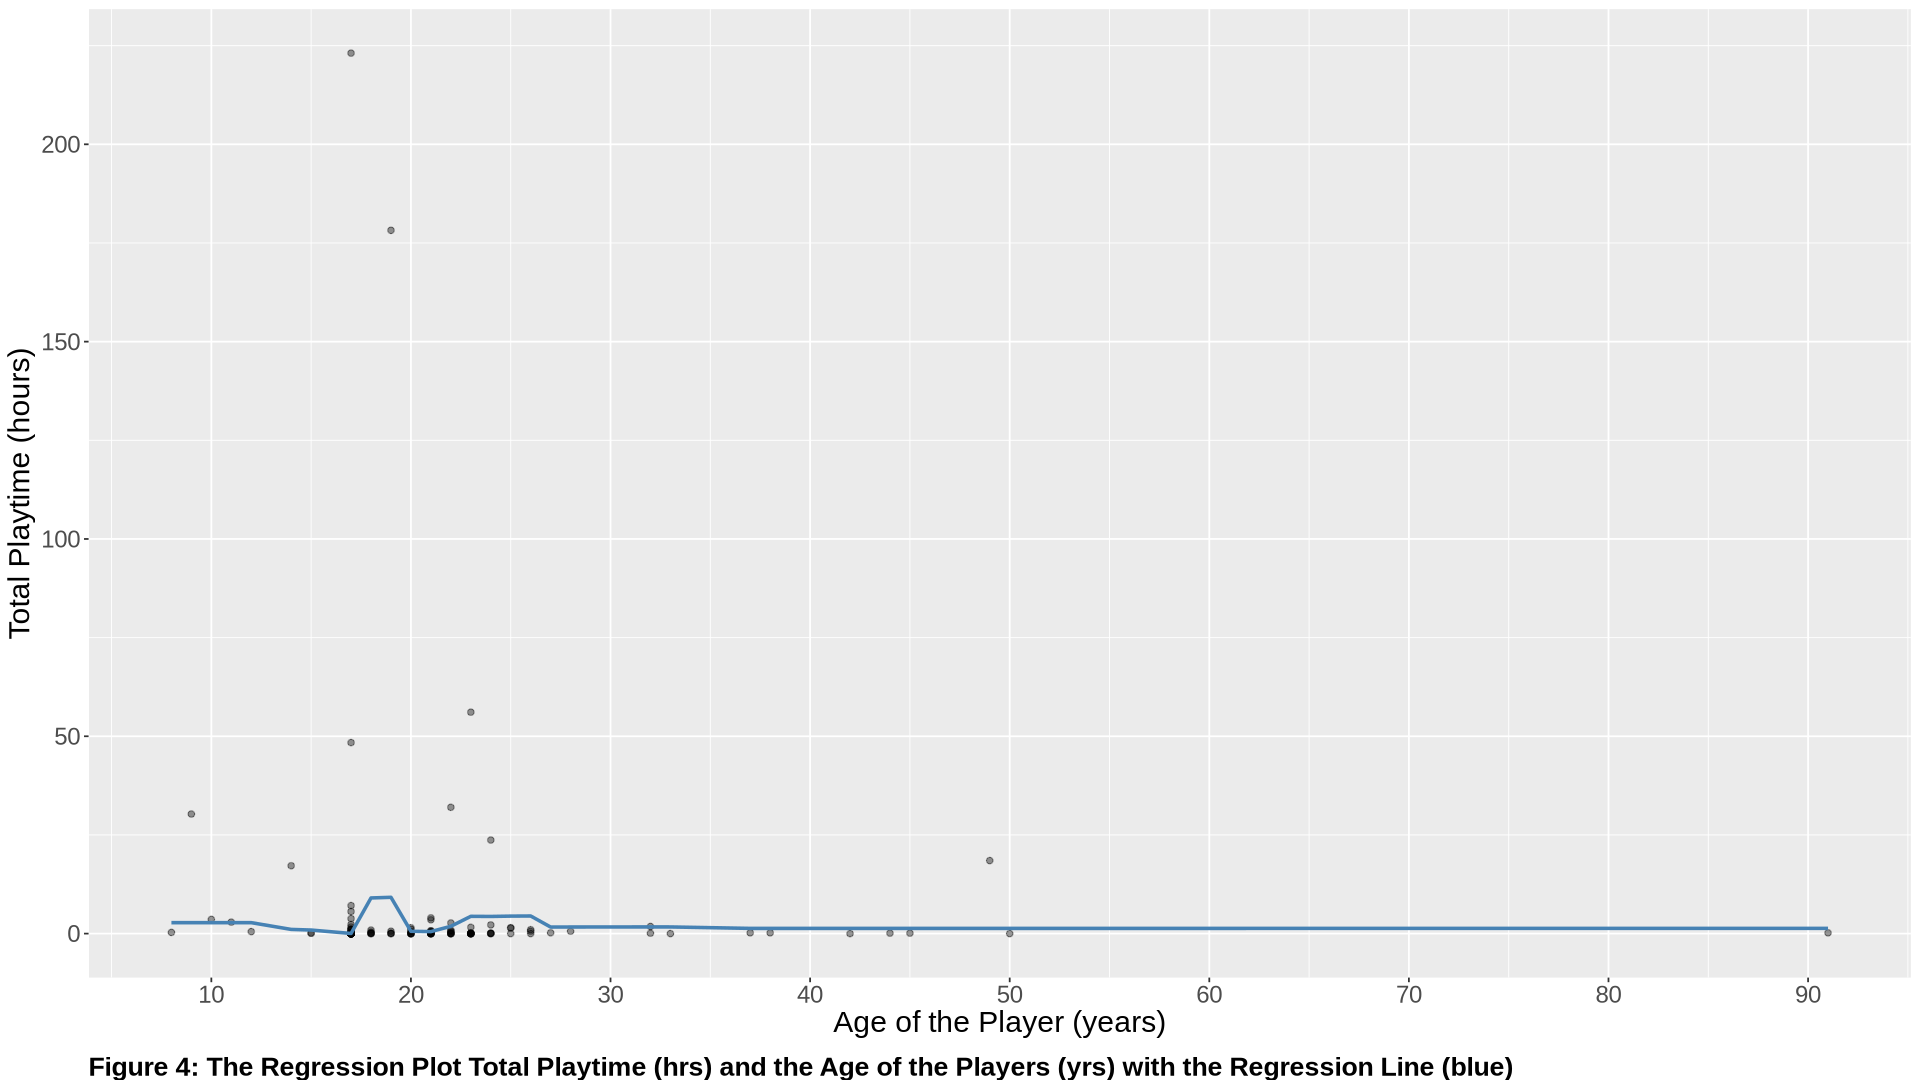

In [54]:
# Plotting the regression graph of mc_train
mc_plot_final <- ggplot(mc_preds, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = mc_preds,
              mapping = aes(x = age, y = .pred),
              color = "steelblue",
              linewidth = 1) +
    labs(x = "Age of the Player (years)",
         y = "Total Playtime (hours)",
         caption = "Figure 4: The Regression Plot Total Playtime (hrs) and the Age of the Players (yrs) with the Regression Line (blue)") +
    theme(text = element_text(size = 18),
          plot.caption = element_text(hjust = 0, vjust = -1, size = 16, face = "bold"))+
    scale_x_continuous(breaks = seq(from = 0, to = 100, by = 10))
mc_plot_final

In [55]:
# Calculate the RMSPE
RMSPE <- mc_fit |>
    predict(mc_test) |>
    bind_cols(mc_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
print(paste("RMSPE =", RMSPE)) 

[1] "RMSPE = 38.2587768034996"


The average root-mean-squared predicted error of the predicted playtime and the actual playtime is approximately **±38.26 hours**.

## <ins>Discussion</ins>

Discussion (words)
As shown in the knn regression plot above, "Total Playtime" spikes as the "Age of the Player" is 17-20. This means that players between 17 and 20 (likely to be university students), are more likely to contribute more play hours than other age groups. This result is expected because it's common knowledge that younger people usually have more gaming experience than older people. Another reason is that most players in the data are under the age of 20, showing that younger people are more likely to show interest in the project than older people.


# To-Do

- [ ] ADJUST NUMBER OF NEIGHBOURS TO USE

**Victor**
- [x] Re-do the introduction with the newer questions + describe the second data set
- [x] Clean up the comments + make graph looks better + add in comment for codes readability
- [x] Fix the Figure titles
- [x] Find articles to cite + redo references

**Andy**
- [ ] Methods & Results: (the rest bullet of points)

**Jack**
- [ ] Methods & Results: Descriptions (first bullet point)
- [x] Added RMSPE calculation
- [x] Added more visualizations 

**Danny**
- [ ] Discussion

## References

- El-Helaly, M. (2024). Artificial Intelligence and occupational health and safety, benefits and drawbacks. PubMed, 115(2), e2024014–e2024014. https://doi.org/10.23749/mdl.v115i2.15835
   
- Khlaif, Z. N., Mousa, A., Hattab, M. K., Itmazi, J., Hassan, A. A., Sanmugam, M., & Ayyoub, A. (2023). The potential and concerns of using AI in scientific research: ChatGPT performance evaluation. JMIR Medical Education, 9, e47049. https://doi.org/10.2196/47049 

- PLAICraft. (2024). Plaicraft.ai. https://www.plaicraft.ai/ 

- Rashid, A. B., & Karim, A. (2024). AI revolutionizing industries worldwide: A comprehensive overview of its diverse applications. Hybrid Advances, 7, 100277–100277. https://doi.org/10.1016/j.hybadv.2024.100277 

- Tang, X., Li, X., Ding, Y., Song, M., & Bu, Y. (2020). The pace of artificial intelligence innovations: Speed, talent, and trial-and-error. Journal of Informetrics, 14(4), 101094–101094. https://doi.org/10.1016/j.joi.2020.101094 